# Inter Quartile Range And Outlier Handling

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### What Is the Interquartile Range(IQR) ?

One common technique to detect outliers is using IQR (interquartile range).
In specific, IQR is the middle 50% of data, which is Q3-Q1.
Q1 is the first quartile, Q3 is the third quartile, and quartile divides an ordered dataset into 4 equal-sized groups.

#### The data is sorted in ascending order and split into 4 equal parts. Q1, Q2, Q3 called first, second and third quartiles are the values which separate the 4 equal parts.
 => Q1 represents the 25th percentile of the data.

 => Q2 represents the 50th percentile of the data.

 => Q3 represents the 75th percentile of the data.

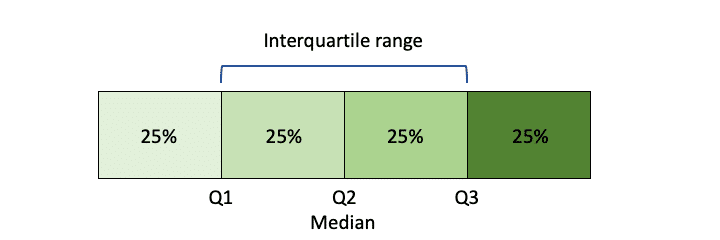

- The interquartile range method defines outliers as values larger than `Q3 + 1.5 * IQR` or the values smaller than `Q1 – 1.5 * IQR`.

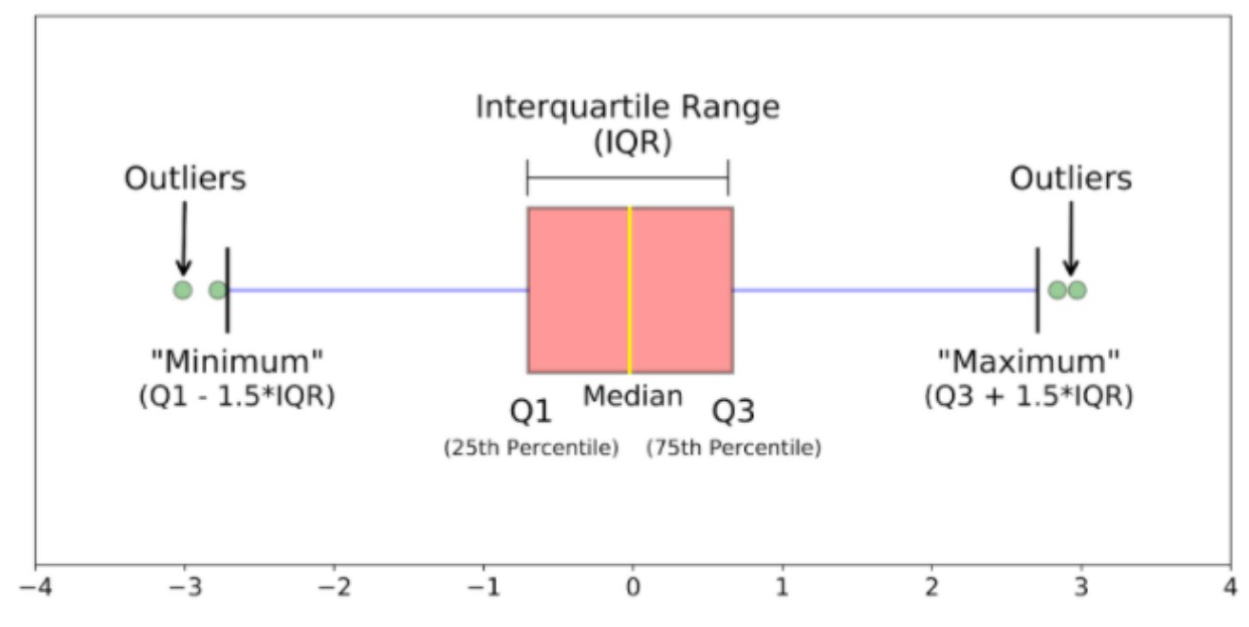

#### In Python, we can use percentile function in NumPy package to find Q1 and Q3.

In [ ]:
# Import numpy library
import numpy as np

data = [1,  2,  3,  4,  5,  6, 10, 12, 55, 60]

# First quartile (Q1)
Q1 = np.percentile(data, 25)
print('Q1 : ',Q1)

# Third quartile (Q3)
Q3 = np.percentile(data, 75)
print('Q3 : ',Q3)

# Interquaritle range (IQR)
IQR = Q3 - Q1

print('IQR : ',IQR)

Q1 :  3.25
Q3 :  11.5
IQR :  8.25


In [ ]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

print('low_limit :', low_lim)
print('up_limit : ', up_lim)

low_limit : -9.125
up_limit :  23.875


In [ ]:
outlier =[]

for x in data:
    if ((x > up_lim) or (x < low_lim)):
         outlier.append(x)

print('outlier in the dataset is', outlier)

outlier in the dataset is [55, 60]


#### Using stats from scipy

In [ ]:
from scipy import stats
IQR = stats.iqr(data)
IQR

NameError: ignored

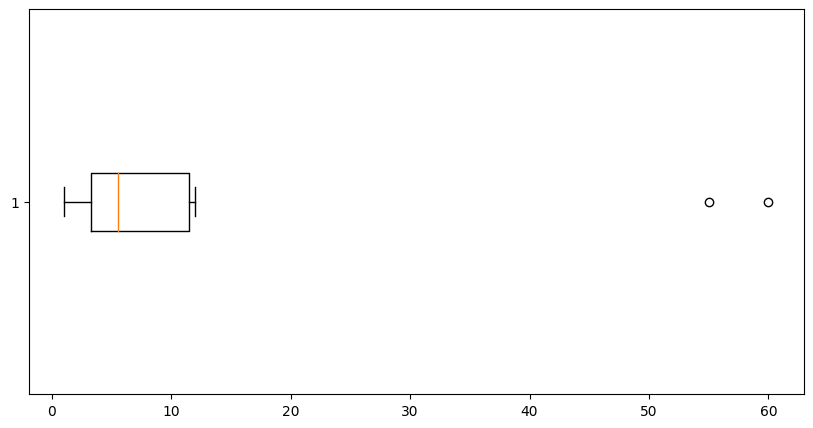

In [ ]:
# Box Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.boxplot(data,vert=False)
plt.show()

Now ,you might be having doubts why `1.5` we are multiplying to get upper and lower limit. So, we have some mathematical interpretation for same. You can refer below link for details.

https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097

### Now as we got enough idea about IQR , lets proceed with Outliers detection and handling

### Why its needed?

One of the most important steps as part of data preprocessing is detecting and treating the outliers as they can negatively affect the statistical analysis and the training process of a machine learning algorithm resulting in lower accuracy.

### What are Outliers?

- odd one out which means something unusual in comparison to the others in a group.
- may occur due to the variability in the data, or due to experimental error/human error.
- ‘Mean’ is the only measure of central tendency that is affected by the outliers which in turn impacts Standard deviation.

**Example:**

Consider a small dataset, sample= [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9].

By looking at it, one can quickly say ‘101’ is an outlier that is much larger than the other values.


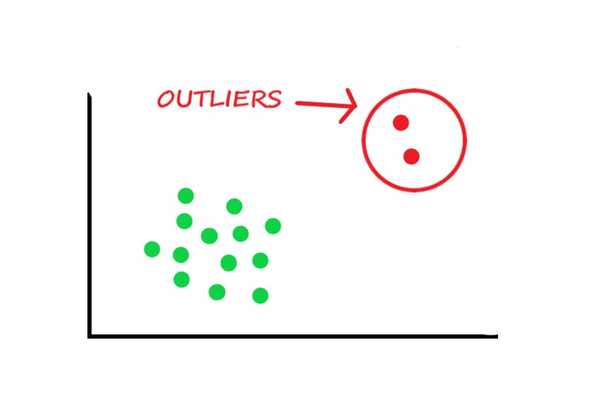

### Outliers Detections And Handling

We mainly use below three ways for outlier detection in given dataset

- Boxplots
- Inter Quantile Range(IQR)
- Z-score

#### 1. Detecting outliers using Boxplot

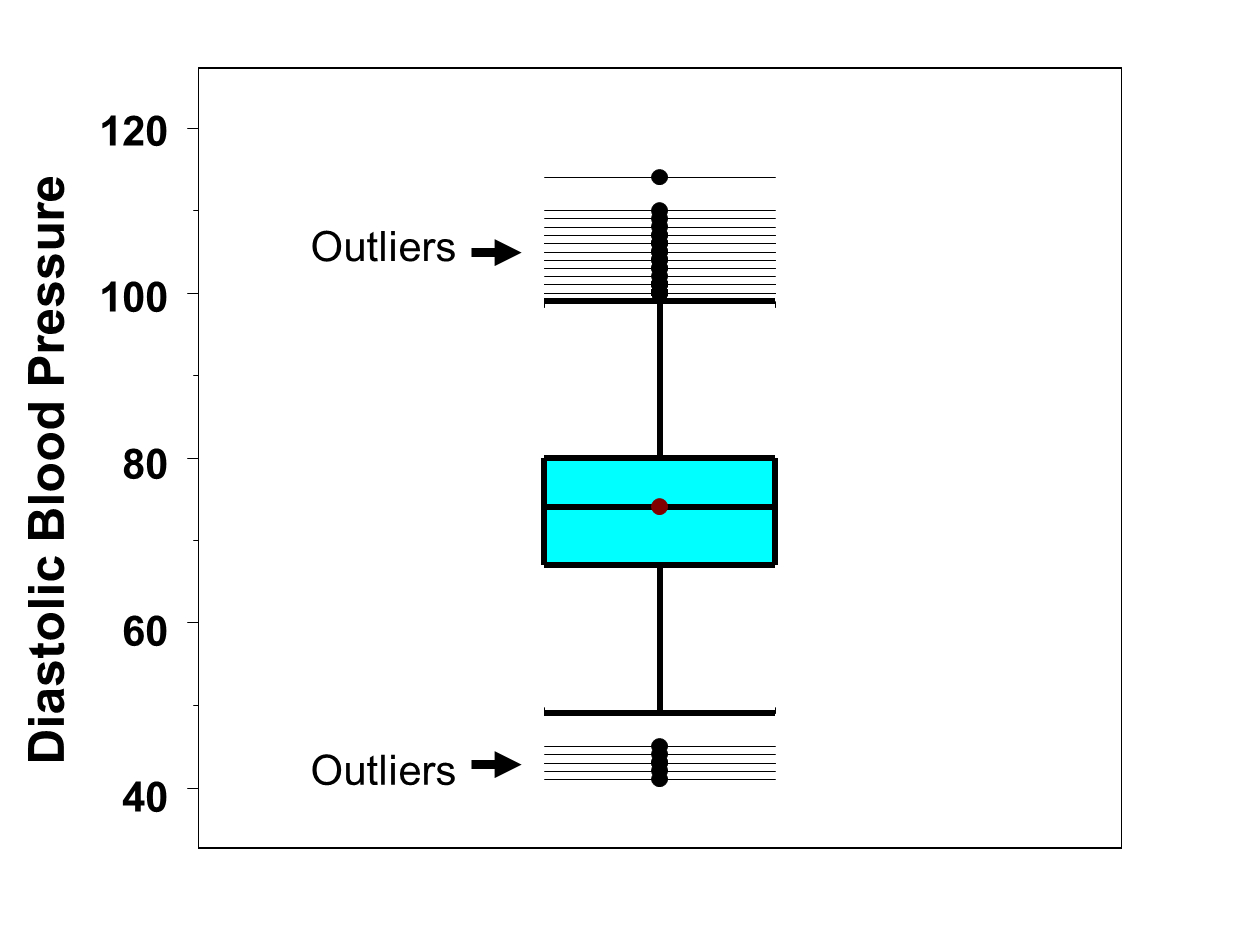

For the box plot on the left, there are dots on both the top and the bottom of the box. These dots are exactly the outliers we calculated before. Since there are outliers on both direction, the upper whisker changes from Max to Q3+1.5*IQR, the bottom whisker changes from Min to Q1–1.5*IQR.

For the box plot on the right, there is NO dot hence NO outliers. In this case, we don’t need to spend effort doing further analysis or finding which points are outliers. Therefore, box plot is a good choice for initial investigation of outliers.

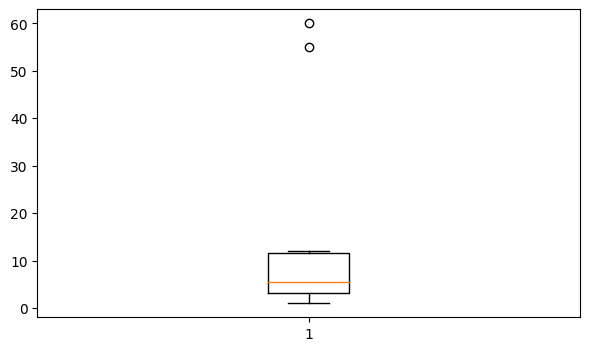

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.boxplot(data)
plt.show()

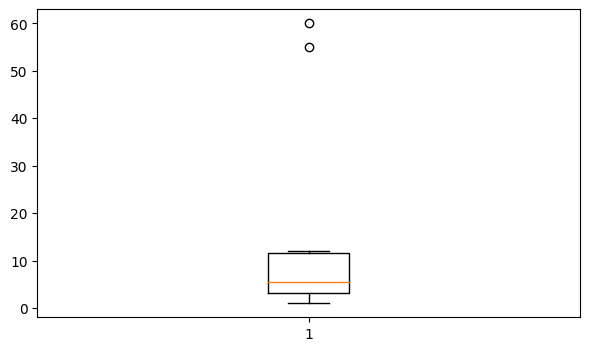

In [ ]:
# Box Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.boxplot(data)
plt.show()

We can handled by removing these datapoints manually .


Sometimes these outliers overlap with each other and can NOT be clearly displayed on the box plot. This is one of the drawbacks of box plot.

#### 2. Detecting outliers using the IQR

Already explained

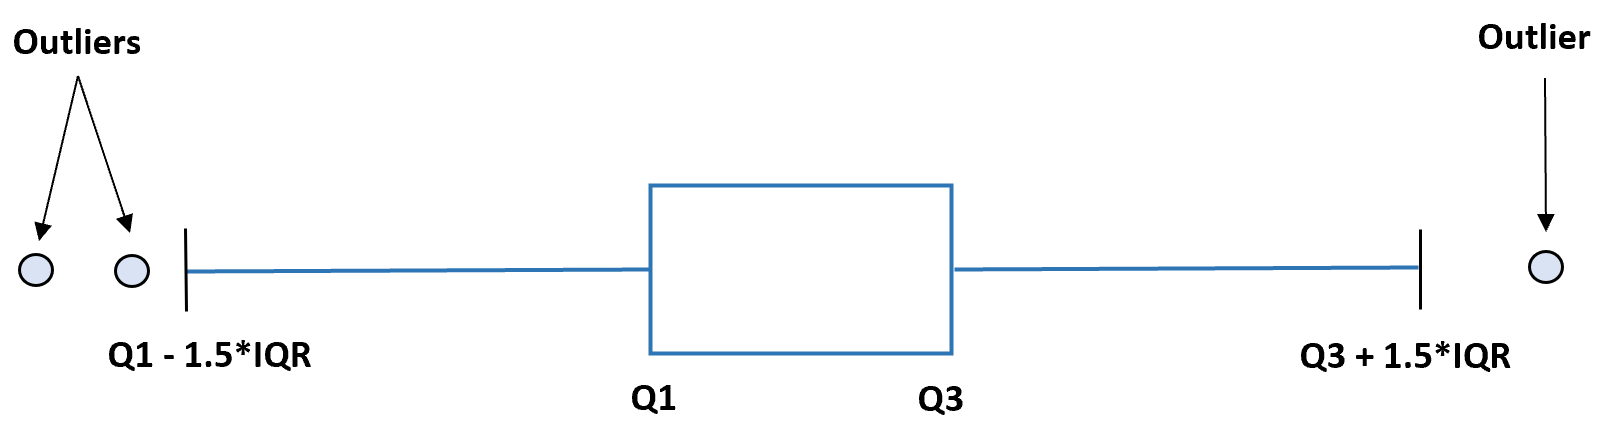

In [ ]:
  # Import numpy library
  import numpy as np
  import pandas as pd

  data1 = [32, 36, 46, 47, 56, 69, 75, 79, 79, 88, 89, 91, 92, 93, 96, 97,
          101, 105, 112, 116 , 500 , 1000]

  df = pd.DataFrame(data1, columns=['Col1'])
  print(df,"\n")

  # First quartile (Q1)
  Q1 = np.percentile(data1, 25)
  print('Q1 : ',Q1)

  # Third quartile (Q3)
  Q3 = np.percentile(data1, 75)
  print('Q3 : ',Q3)

  # Interquaritle range (IQR)
  IQR = Q3 - Q1

  print('IQR : ',IQR)

    Col1
0     32
1     36
2     46
3     47
4     56
5     69
6     75
7     79
8     79
9     88
10    89
11    91
12    92
13    93
14    96
15    97
16   101
17   105
18   112
19   116
20   500
21  1000 

Q1 :  70.5
Q3 :  100.0
IQR :  29.5


In [ ]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

print('low_limit :', low_lim)
print('up_limit : ', up_lim)

low_limit : 26.25
up_limit :  144.25


In [ ]:
outlier =[]

for x in data1:
    if ((x > up_lim) or (x < low_lim)):
         outlier.append(x)

print('outlier in the dataset is', outlier)

outlier in the dataset is [500, 1000]


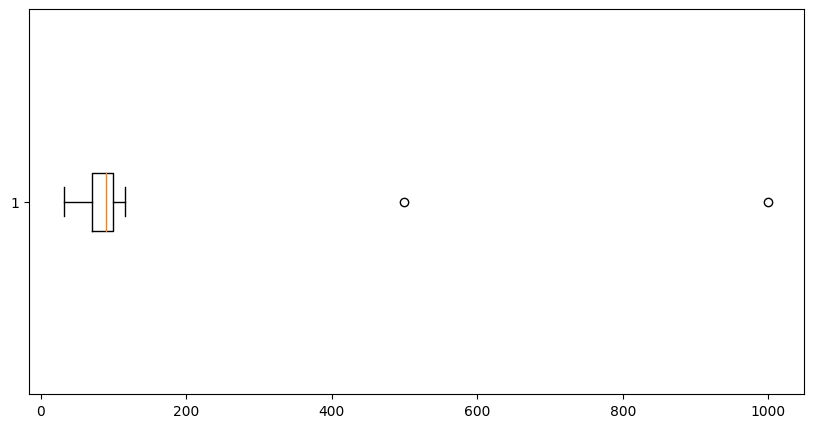

In [ ]:
# Box Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.boxplot(data1,vert=False)
plt.show()

#### Handling these outliers

In [ ]:
print(df2)

    Col1
0     32
1     36
2     46
3     47
4     56
5     69
6     75
7     79
8     79
9     88
10    89
11    91
12    92
13    93
14    96
15    97
16   101
17   105
18   112
19   116


#### 3. Detecting outliers using the Z-scores

Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.

### 68-95-99.7 Rule

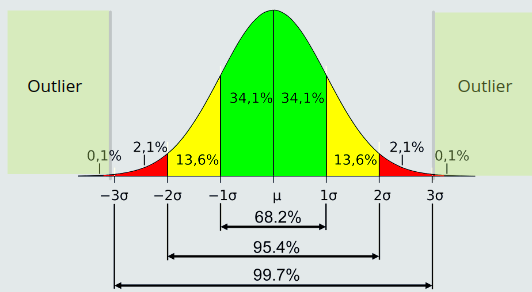

#### Any data point whose Z-score falls out of 3rd standard deviation is an outlier.

In [ ]:
from scipy import stats
z=np.abs(stats.zscore(df))

In [ ]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df))
print(z)

        Col1
0   0.523049
1   0.503831
2   0.455784
3   0.450980
4   0.407738
5   0.345278
6   0.316450
7   0.297232
8   0.297232
9   0.253990
10  0.249185
11  0.239576
12  0.234772
13  0.229967
14  0.215553
15  0.210748
16  0.191530
17  0.172311
18  0.138679
19  0.119461
20  1.725517
21  4.127830


In [ ]:
threshold1 =3
threshold2 =-3

In [ ]:
df3 = df[(z < threshold1).all(axis=1)]
print(df3)

    Col1
0     32
1     36
2     46
3     47
4     56
5     69
6     75
7     79
8     79
9     88
10    89
11    91
12    92
13    93
14    96
15    97
16   101
17   105
18   112
19   116
20   500


In [ ]:
((z < threshold1)).all(axis=1)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21    False
dtype: bool

In [ ]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(df['Col1'])
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [1000]


### Some Other Techniques for Handling Outliers

- `Removing the outlier (Already covered)`
    -  we remove the outliers from the dataset


- `Quantile based flooring and capping`
    -  Replacing outlier with quantile values
    - The data points that are lesser than the 10th percentile are replaced with the 10th percentile value and the data points that are greater than the 90th percentile are replaced with 90th percentile value


- `Mean/Median imputation`
    - Mean value is generally highly influenced by the outliers, so replacing the outliers with the median value.

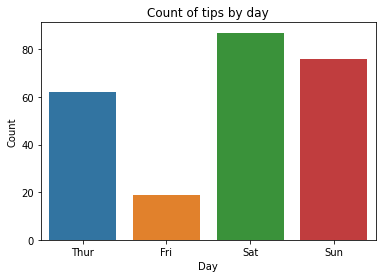

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
tips = sns.load_dataset('tips')

# Plot a countplot of the 'day' column
sns.countplot(x='day', data=tips)

# Set the title and axis labels
plt.title('Count of tips by day')
plt.xlabel('Day')
plt.ylabel('Count')

# Show the plot
plt.show()


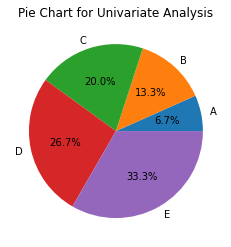

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a dataset
data = pd.Series([5, 10, 15, 20, 25], index=['A', 'B', 'C', 'D', 'E'], name='Sample Data')

# Plot the pie chart
plt.pie(data.values, labels=data.index, autopct='%1.1f%%')

# Add a title
plt.title('Pie Chart for Univariate Analysis')

# Show the chart
plt.show()


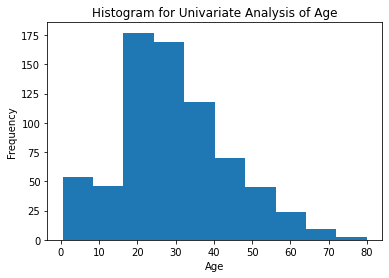

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data into a pandas DataFrame
data = pd.read_csv('titanic.csv')

# Extract the numerical column to visualize
column_name = 'Age'
column_data = data[column_name]

# Create a histogram with 10 bins
plt.hist(column_data, bins=10)

# Add a title and labels for x and y axes
plt.title('Histogram for Univariate Analysis of ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Frequency')

# Show the plot
plt.show()
